<a href="https://colab.research.google.com/github/utpalrtw/projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Librarys**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Read Dataset**

In [21]:
data = pd.read_csv('Heart disease.csv')
data.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
851,62,1,3,130,231,0,0,146,0,1.8,2,0
400,61,1,3,200,0,1,1,70,0,0.0,2,1
773,55,1,4,140,217,0,0,111,1,5.6,3,1
734,56,0,4,200,288,1,2,133,1,4.0,3,1
1098,38,1,1,120,231,0,0,182,1,3.8,2,1


### EDA

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [23]:
data.duplicated().sum()

np.int64(272)

In [24]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [25]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


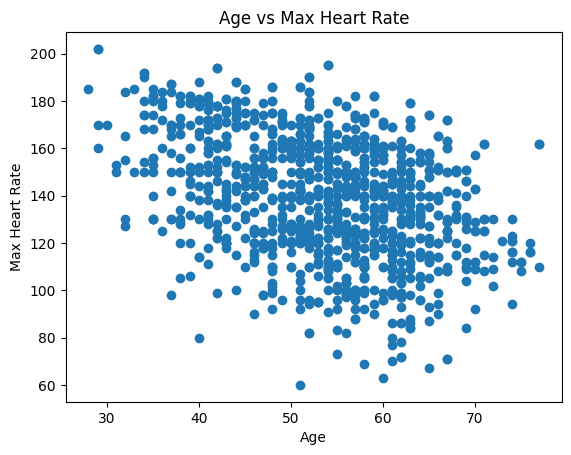

In [26]:
plt.scatter(data['age'], data['max heart rate'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')
plt.show()

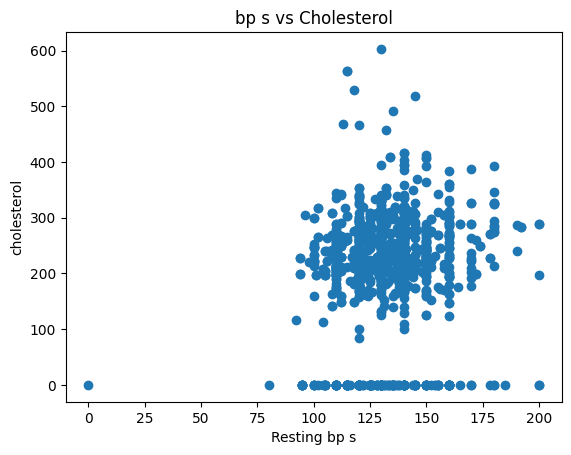

In [27]:
plt.scatter(data['resting bp s'], data['cholesterol'])
plt.xlabel('Resting bp s')
plt.ylabel('cholesterol')
plt.title('bp s vs Cholesterol')
plt.show()

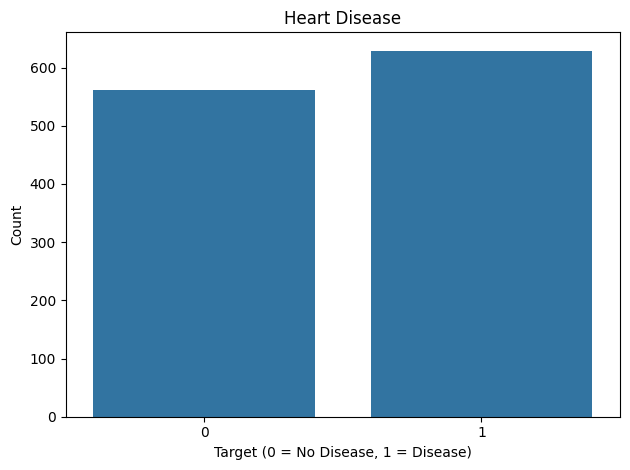

In [28]:
sns.countplot(data=data, x='target')
plt.title("Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [40]:
data['target'].value_counts()

,count
target,
1,629
0,561


<Axes: >

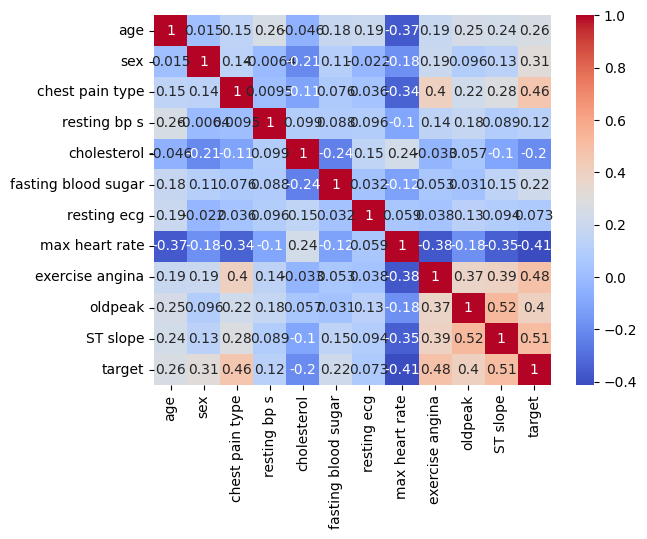

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Building Models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [31]:
X = data.drop(columns=["target"])
y = data["target"]

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42,stratify=y)

Without **stratify** we may get better accuracy but, The stratify=y parameter in train_test_split() ensures that the class distribution in both the training and test sets matches the original distribution in your dataset. Data set is almost balanced so, i preferred to provide more data for training.

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM" : SVC(probability=True, random_state=42)
}

In [35]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)
    results[name] = {
        "AUC": auc,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"]
    }

pd.DataFrame(results).T.sort_values("AUC", ascending=False)

,AUC,Accuracy,Precision,Recall,F1-score
XGBoost,0.964286,0.966387,0.940299,1.000000,0.969231
Random Forest,0.948413,0.949580,0.938462,0.968254,0.953125
SVM,0.904762,0.907563,0.882353,0.952381,0.916031
Logistic Regression,0.837302,0.840336,0.823529,0.888889,0.854962


We Have to find best parameter for RandomforestClassifier so, we use GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("\nBest Parameters (Random Forest):", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy",accuracy_score(y_test, y_pred_rf))


Best Parameters (Random Forest): {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.92      0.95      0.94        63

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119

Accuracy 0.9327731092436975


We train a tuned Gradient Boosting model that aims to achieve high accuracy.


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.94      0.94      0.94        63

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119

Accuracy: 0.9327731092436975


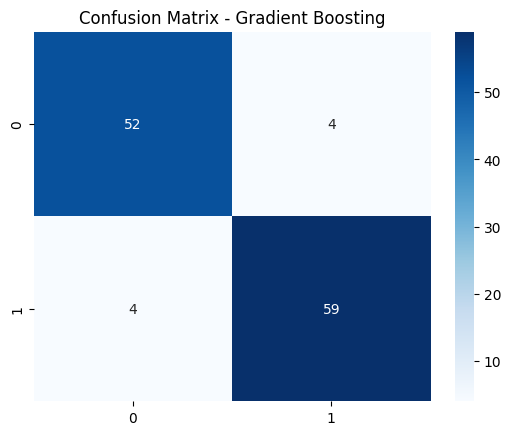

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 566, number of negative: 505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 1071, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528478 -> initscore=0.114036
[LightGBM] [Info] Start training from score 0.114036

LightGBM  - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.94      1.00      0.97        63

    accuracy                           0.97       119
   macro avg       0.97      0.96      0.97       119
weighted avg       0.97      0.97      0.97       119

Accurac

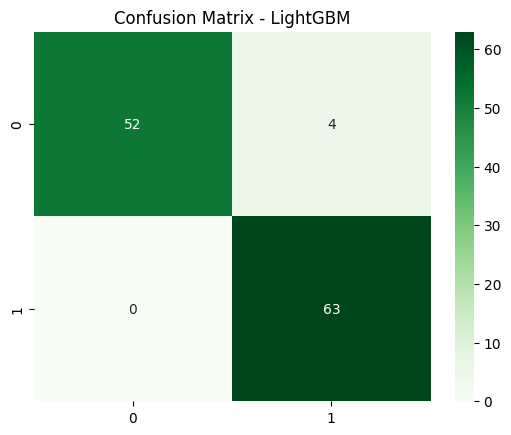

In [38]:
from lightgbm import LGBMClassifier


model_lgb = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=300,
    random_state=42
)

model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

print("\nLightGBM  - Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))

sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - LightGBM")
plt.show()